In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Load your CSV into a DataFrame
df = pd.read_csv('all_data.csv', on_bad_lines='skip')
display(df)

,Kunde,customname,customform,name,fieldobjectid,fieldparentid,fieldparenttype,elementtype,fieldtype,blocktype,specialtype,fieldrelation,fieldlabel,language
0,abinventech,form876,876,Kundereklamation,877,878.0,customformelement,field,listselect,NaN,NaN,form2488,Vælg kunde,DA
1,abinventech,form876,876,Kundereklamation,878,NaN,customform,block,NaN,layout_fieldset,NaN,NaN,Kundeoplysninger,DA
2,abinventech,form876,876,Kundereklamation,879,878.0,customformelement,field,string,NaN,NaN,NaN,Gadenavn,DA
3,abinventech,form876,876,Kundereklamation,880,878.0,customformelement,field,string,NaN,NaN,NaN,Postnr,DA
4,abinventech,form876,876,Kundereklamation,881,878.0,customformelement,field,string,NaN,NaN,NaN,By,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,ipw,form1927875,1927875,Azure - Udløb af client secret,2610308,2592044.0,customformelement,special,NaN,NaN,createdby,NaN,Ansvarlig for opsætning,DA
10332,ipw,form1329139,1329139,Leverancer,2612534,NaN,customform,block,NaN,layout_fieldset,NaN,NaN,UDGÅET felter,DA
10333,ipw,form1329139,1329139,Leverancer,2612540,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA
10334,ipw,form1329139,1329139,Leverancer,2612546,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA


Let's explore the data by checking on missing values.

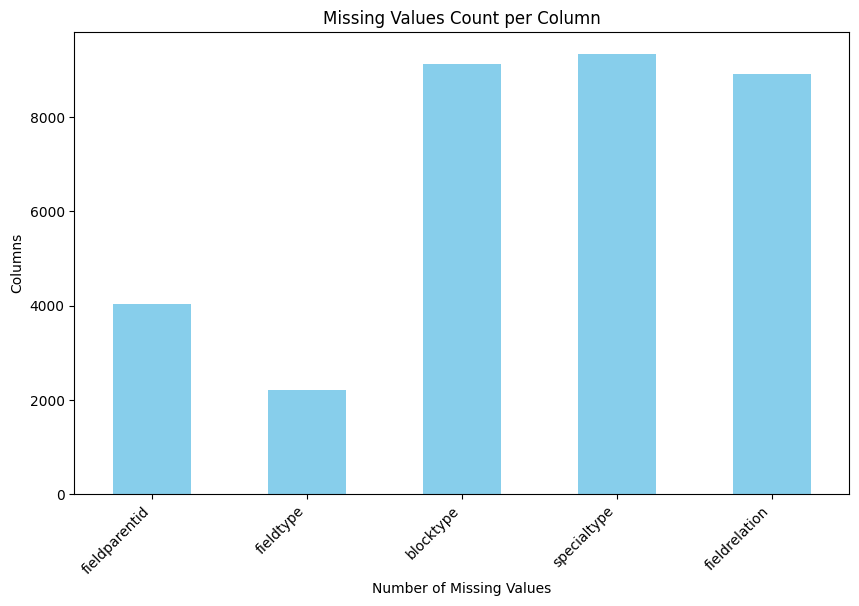

In [3]:
# Bar plot of missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns without missing values

plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

- the elementtype of "block" will be removed where its just a style that group some elements together its not required in our project (from IPW).
- blocktype is the type of the block which we will remove it as well.
- fieldparentid is a reletional id between the elements and thier parent group.
- field type have some missing values because the when the element is specia or block the type stored is ("blocktype","specialtype").
- fieldrelation is for relational elementtypes where it refer to another part in the system (output of and helptabel) we wont included that in the prototype.

In [4]:
# Remove all elements of type block.(maybe late include it)
indices_to_drop = df[df['elementtype'] == 'block'].index

# Drop those indices
df = df.drop(indices_to_drop)
display(df)

,Kunde,customname,customform,name,fieldobjectid,fieldparentid,fieldparenttype,elementtype,fieldtype,blocktype,specialtype,fieldrelation,fieldlabel,language
0,abinventech,form876,876,Kundereklamation,877,878.0,customformelement,field,listselect,NaN,NaN,form2488,Vælg kunde,DA
2,abinventech,form876,876,Kundereklamation,879,878.0,customformelement,field,string,NaN,NaN,NaN,Gadenavn,DA
3,abinventech,form876,876,Kundereklamation,880,878.0,customformelement,field,string,NaN,NaN,NaN,Postnr,DA
4,abinventech,form876,876,Kundereklamation,881,878.0,customformelement,field,string,NaN,NaN,NaN,By,DA
5,abinventech,form876,876,Kundereklamation,882,878.0,customformelement,field,string,NaN,NaN,NaN,Telefonnummer,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,ipw,form10274,2386659,Intern IT Support,2601947,2386665.0,customformelement,special,NaN,NaN,layout_text,NaN,"Registrerer du tid, kan du bruge flg. opg.nr: ...",DA
10331,ipw,form1927875,1927875,Azure - Udløb af client secret,2610308,2592044.0,customformelement,special,NaN,NaN,createdby,NaN,Ansvarlig for opsætning,DA
10333,ipw,form1329139,1329139,Leverancer,2612540,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA
10334,ipw,form1329139,1329139,Leverancer,2612546,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA


we will take the value for specialtype and put it in fieldtype we will avoid null values on fieldtype and keep the fieldtype.

In [5]:
for index, row in df.iterrows():
    if row['elementtype'] == 'special' and pd.isnull(row['fieldtype']):  # Check if 'elementtype' is empty
        df.at[index, 'fieldtype'] = row['specialtype']  # Assign 'specialtype' value to 'elementtype'

# Display the updated data
display(df)

,Kunde,customname,customform,name,fieldobjectid,fieldparentid,fieldparenttype,elementtype,fieldtype,blocktype,specialtype,fieldrelation,fieldlabel,language
0,abinventech,form876,876,Kundereklamation,877,878.0,customformelement,field,listselect,NaN,NaN,form2488,Vælg kunde,DA
2,abinventech,form876,876,Kundereklamation,879,878.0,customformelement,field,string,NaN,NaN,NaN,Gadenavn,DA
3,abinventech,form876,876,Kundereklamation,880,878.0,customformelement,field,string,NaN,NaN,NaN,Postnr,DA
4,abinventech,form876,876,Kundereklamation,881,878.0,customformelement,field,string,NaN,NaN,NaN,By,DA
5,abinventech,form876,876,Kundereklamation,882,878.0,customformelement,field,string,NaN,NaN,NaN,Telefonnummer,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,ipw,form10274,2386659,Intern IT Support,2601947,2386665.0,customformelement,special,layout_text,NaN,layout_text,NaN,"Registrerer du tid, kan du bruge flg. opg.nr: ...",DA
10331,ipw,form1927875,1927875,Azure - Udløb af client secret,2610308,2592044.0,customformelement,special,createdby,NaN,createdby,NaN,Ansvarlig for opsætning,DA
10333,ipw,form1329139,1329139,Leverancer,2612540,1361554.0,customformelement,special,layout_text,NaN,layout_text,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA
10334,ipw,form1329139,1329139,Leverancer,2612546,1361554.0,customformelement,special,layout_text,NaN,layout_text,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA


To ensure that element type is a catagorical lets see it on wordcloud.

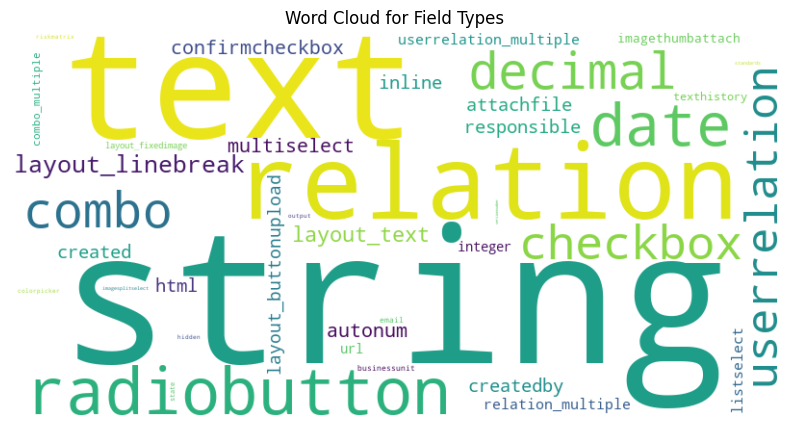

In [6]:
# Check if fieldtype is catagorical.
fieldtype = df['fieldtype'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fieldtype)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Field Types')
plt.show()

The following columns will be removed as they are not relevant to the form structure:

-Kunde: The customer's name.
-elementtype: Already addressed.
-customname: The class name in the code.
-fieldobjectid.
-fieldparentid: If the element is in a block, it has the block ID as the parent; otherwise, it's the form itself.
-blocktype.
-fieldrelation: Indicates element relationships, but we will remove it for now.
-language.
-specialtype: Already transferred to fieldtype.

In [7]:
df = df.drop(columns=['Kunde','fieldtype','customform','specialtype','elementtype', 'customname','fieldobjectid','fieldparentid','fieldparenttype','blocktype','fieldrelation','language'])
display(df)

,name,fieldlabel
0,Kundereklamation,Vælg kunde
2,Kundereklamation,Gadenavn
3,Kundereklamation,Postnr
4,Kundereklamation,By
5,Kundereklamation,Telefonnummer
...,...,...
10330,Intern IT Support,"Registrerer du tid, kan du bruge flg. opg.nr: ..."
10331,Azure - Udløb af client secret,Ansvarlig for opsætning
10333,Leverancer,Installationen oprettes på domænet xxxx.ipw.dk
10334,Leverancer,Installationen oprettes på domænet <b>xxxx.ipw...


In [8]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Print missing values if any
if missing_values.empty:
    print("There are no missing values in the dataset.")
else:
    print("Missing values found:")
    print(missing_values)


There are no missing values in the dataset.


the folowing code block is the data process with out plot and checks can be copied and train models woth it. 

In [9]:
import pandas as pd

df = pd.read_csv('all_data.csv', on_bad_lines='skip')
#handle blocktype(removeit).
indices_to_drop = df[df['elementtype'] == 'block'].index
df = df.drop(indices_to_drop)

#put specialtype in place.
for index, row in df.iterrows():
    if row['elementtype'] == 'special' and pd.isnull(row['fieldtype']):  # Check if 'elementtype' is empty
        df.at[index, 'fieldtype'] = row['specialtype']  # Assign 'specialtype' value to 'elementtype'

df = df.drop(columns=['Kunde','fieldtype','customform','specialtype','elementtype', 'customname','fieldobjectid','fieldparentid','fieldparenttype','blocktype','fieldrelation','language'])
display(df)

,name,fieldlabel
0,Kundereklamation,Vælg kunde
2,Kundereklamation,Gadenavn
3,Kundereklamation,Postnr
4,Kundereklamation,By
5,Kundereklamation,Telefonnummer
...,...,...
10330,Intern IT Support,"Registrerer du tid, kan du bruge flg. opg.nr: ..."
10331,Azure - Udløb af client secret,Ansvarlig for opsætning
10333,Leverancer,Installationen oprettes på domænet xxxx.ipw.dk
10334,Leverancer,Installationen oprettes på domænet <b>xxxx.ipw...
